# Task 1

## Import Libraries

In [5]:
import pandas as pd
import numpy as np

## Import raw data and merge the data

In [6]:
Nextbike_bochum_raw = pd.read_csv("./dataset/bochum.csv")
Nextbike_leipzig_raw = pd.read_csv("./dataset/leipzig.csv")
Nextbike_raw = Nextbike_bochum_raw.append(Nextbike_leipzig_raw)

Nextbike_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202697 entries, 0 to 185326
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   day            202697 non-null  object 
 1   time           202697 non-null  object 
 2   b_number       202697 non-null  int64  
 3   city           202697 non-null  object 
 4   trip_duration  202697 non-null  object 
 5   orig_lat       202697 non-null  float64
 6   orig_lng       202697 non-null  float64
 7   dest_lat       202697 non-null  float64
 8   dest_lng       202697 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 15.5+ MB


## Look for null values

In [7]:
Nextbike_raw.isnull().sum().sort_values(ascending=False)

dest_lng         0
dest_lat         0
orig_lng         0
orig_lat         0
trip_duration    0
city             0
b_number         0
time             0
day              0
dtype: int64

In [8]:
#Copy dataset for cleaning
Nextbike_clean = Nextbike_raw

## Correct Data Types

In [9]:
#Converting Trip Length to timedelta
Nextbike_clean['trip_duration'] = pd.to_timedelta(Nextbike_clean['trip_duration'])

#Converting start-time to datetime
Nextbike_clean['timestamp'] = pd.to_datetime(Nextbike_clean['day'] + ' ' +  Nextbike_clean['time'])
Nextbike_clean.drop(columns=['day','time'], inplace = True)

## Add columns for analysis

In [10]:
#Round datetime and extract possible categorisation attributes
Nextbike_clean['timestamp_rounded'] = Nextbike_clean['timestamp'].dt.floor('H')

Nextbike_clean['Weekday'] = Nextbike_clean['timestamp_rounded'].dt.weekday

Nextbike_clean['Time'] = Nextbike_clean['timestamp_rounded'].dt.time
Nextbike_clean["Time"] = Nextbike_clean["Time"].astype(str).str[:2].astype(int)

Nextbike_clean["date"] = Nextbike_clean.timestamp.dt.date
Nextbike_clean["date_str"] = Nextbike_clean.timestamp.dt.date.astype(str)

#take trip duration in minutes, calculate 1€ per 30 minutes of usage
Nextbike_clean["revenue"] = np.ceil((Nextbike_clean.trip_duration.dt.total_seconds()/60) /30)


#output
Nextbike_clean

,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_rounded,Weekday,Time,date,date_str,revenue
0,683,bochum,0 days 00:10:00,51.489814,7.232856,51.479592,7.222239,2019-02-08 12:06:00,2019-02-08 12:00:00,4,12,2019-02-08,2019-02-08,1.0
1,683,bochum,0 days 00:14:00,51.479592,7.222239,51.472366,7.250500,2019-02-10 01:58:00,2019-02-10 01:00:00,6,1,2019-02-10,2019-02-10,1.0
2,683,bochum,0 days 00:28:00,51.472366,7.250500,51.479592,7.222239,2019-02-11 06:33:00,2019-02-11 06:00:00,0,6,2019-02-11,2019-02-11,1.0
3,683,bochum,0 days 00:58:00,51.479592,7.222239,51.483023,7.215314,2019-02-11 13:31:00,2019-02-11 13:00:00,0,13,2019-02-11,2019-02-11,2.0
4,683,bochum,0 days 00:22:00,51.483023,7.215314,51.479592,7.222239,2019-02-11 14:32:00,2019-02-11 14:00:00,0,14,2019-02-11,2019-02-11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185322,99979,leipzig,0 days 00:07:00,51.468822,11.290048,51.468547,11.289899,2019-05-25 10:58:00,2019-05-25 10:00:00,5,10,2019-05-25,2019-05-25,1.0
185323,99979,leipzig,0 days 01:16:00,51.468756,11.289723,51.469324,11.289366,2019-05-27 09:32:00,2019-05-27 09:00:00,0,9,2019-05-27,2019-05-27,3.0
185324,99979,leipzig,0 days 00:03:00,51.469044,11.289348,51.469093,11.289432,2019-05-27 11:02:00,2019-05-27 11:00:00,0,11,2019-05-27,2019-05-27,1.0
185325,99982,leipzig,0 days 01:44:00,51.341165,12.365045,51.341065,12.365005,2019-02-11 11:47:00,2019-02-11 11:00:00,0,11,2019-02-11,2019-02-11,4.0




# Task 2

## Import Visualisation Libaries

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Split data for analysis

In [51]:
Nextbike_clean_l = Nextbike_clean[Nextbike_clean.city == "leipzig"]
Nextbike_clean_b = Nextbike_clean[Nextbike_clean.city == "bochum"]

#dfl = Nextbike_clean_l[:]
#dfb = Nextbike_clean_b[:]

Nextbike_clean_l

,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,timestamp,timestamp_rounded,Weekday,Time,date,date_str,revenue
0,10900,leipzig,0 days 00:12:00,51.330271,12.341983,51.330347,12.342159,2019-04-16 11:17:00,2019-04-16 11:00:00,1,11,2019-04-16,2019-04-16,1.0
1,10900,leipzig,0 days 00:08:00,51.330347,12.342159,51.330271,12.342199,2019-04-16 11:35:00,2019-04-16 11:00:00,1,11,2019-04-16,2019-04-16,1.0
2,10900,leipzig,0 days 00:40:00,51.330267,12.342196,51.330236,12.342012,2019-04-16 11:53:00,2019-04-16 11:00:00,1,11,2019-04-16,2019-04-16,2.0
3,10900,leipzig,0 days 00:03:00,51.330298,12.341811,51.330267,12.341958,2019-04-16 14:35:00,2019-04-16 14:00:00,1,14,2019-04-16,2019-04-16,1.0
4,20000,leipzig,0 days 00:20:00,51.343107,12.376471,51.330422,12.337838,2019-05-21 09:47:00,2019-05-21 09:00:00,1,9,2019-05-21,2019-05-21,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185322,99979,leipzig,0 days 00:07:00,51.468822,11.290048,51.468547,11.289899,2019-05-25 10:58:00,2019-05-25 10:00:00,5,10,2019-05-25,2019-05-25,1.0
185323,99979,leipzig,0 days 01:16:00,51.468756,11.289723,51.469324,11.289366,2019-05-27 09:32:00,2019-05-27 09:00:00,0,9,2019-05-27,2019-05-27,3.0
185324,99979,leipzig,0 days 00:03:00,51.469044,11.289348,51.469093,11.289432,2019-05-27 11:02:00,2019-05-27 11:00:00,0,11,2019-05-27,2019-05-27,1.0
185325,99982,leipzig,0 days 01:44:00,51.341165,12.365045,51.341065,12.365005,2019-02-11 11:47:00,2019-02-11 11:00:00,0,11,2019-02-11,2019-02-11,4.0


## Find out size of the fleet
The idea is that a bike is recognized as part of the fleet if it has been rented in the last 7 days. So the size of the fleet is the amount of unique Bike IDs that have records for the last 7 days. We calculate this on a daily level to be precise yet not too intense to compute.

In [64]:
df= Nextbike_clean_l[:]
#Fleet size for city leipzig
start_date = df.date.min()
end_date = df.date.max()
delta = pd.to_timedelta("1d")

dates = []
while start_date <= end_date:
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta


fleet_size = pd.DataFrame([], index = dates, columns = ["search_array","fleet_size"]) 

search_array = []
for index, row in fleet_size.iterrows():
    search_array.append(index)
    if len(search_array) > 7:
        search_array.pop(0)
    #row["date_str"] = index
    row['search_array'] = search_array[:]
    row['fleet_size'] = df[df.date.astype(str).isin(search_array[:])].b_number.nunique()
    
fleet_size.drop(columns=["search_array"], inplace = True)
fleet_size

,fleet_size
2019-02-01,256
2019-02-02,329
2019-02-03,350
2019-02-04,390
2019-02-05,421
...,...
2019-06-26,785
2019-06-27,787
2019-06-28,789
2019-06-29,795


## Analysis for revenue and fleet size

In [67]:
#daily dateset for city leipzig
df_by_date = dfl.groupby("date_str").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    used_bikes=('b_number', pd.Series.nunique))

df_by_date.index.astype(str, copy = False)
fleet_size.index.astype(str, copy= False)

df_by_date_merged = fleet_size.join(df_by_date)
df_by_date_merged["usage"] = df_by_date_merged["used_bikes"] / df_by_date_merged["fleet_size"]
df_by_date_merged["revenue_pro_bike"] = df_by_date_merged["revenue"] / df_by_date_merged["fleet_size"]
df_by_date_merged["revenue_pro_trip"] = df_by_date_merged["revenue"] / df_by_date_merged["trips"]


df_by_date_merged

,fleet_size,revenue,trips,used_bikes,usage,revenue_pro_bike,revenue_pro_trip
2019-02-01,256,785.0,659.0,256.0,1,3.06641,1.191199
2019-02-02,329,664.0,526.0,241.0,0.732523,2.01824,1.262357
2019-02-03,350,352.0,285.0,162.0,0.462857,1.00571,1.235088
2019-02-04,390,623.0,499.0,237.0,0.607692,1.59744,1.248497
2019-02-05,421,654.0,573.0,251.0,0.5962,1.55344,1.141361
...,...,...,...,...,...,...,...
2019-06-26,785,3039.0,2552.0,585.0,0.745223,3.87134,1.190831
2019-06-27,787,2993.0,2555.0,600.0,0.762389,3.80305,1.171429
2019-06-28,789,3417.0,2857.0,627.0,0.794677,4.3308,1.196010
2019-06-29,795,3737.0,2780.0,625.0,0.786164,4.70063,1.344245


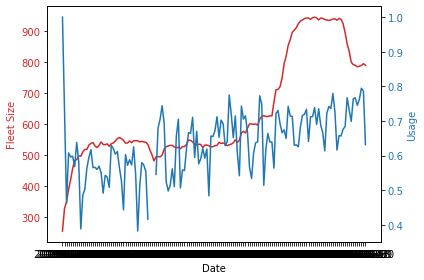

In [54]:
#Visualisation of daily usage in Leipzig
dates = df_by_date_merged.index
fleetsize = df_by_date_merged["fleet_size"]
usage = df_by_date_merged["usage"]
usedbikes = df_by_date_merged["used_bikes"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:red'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Fleet Size', color=color)
ax_1.plot(dates, fleetsize, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

ax_2 = ax_1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'

ax_2.set_ylabel("Usage", color=color)
ax_2.plot(dates, usage, color=color)
ax_2.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

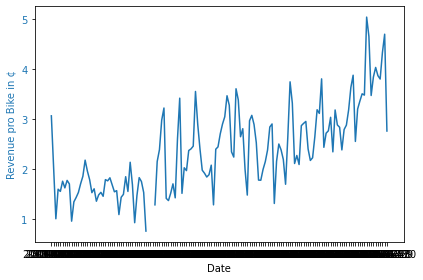

In [73]:
#Visualisation of daily revenue pro bike in Leipzig
dates = df_by_date_merged.index
revenueb = df_by_date_merged["revenue_pro_bike"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Revenue pro Bike in ¢', color=color)
ax_1.plot(dates, revenueb, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

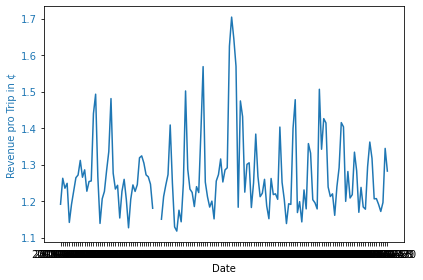

In [74]:
#Visualisation of daily revenue pro trip in Leipzig
dates = df_by_date_merged.index
revenuet = df_by_date_merged["revenue_pro_trip"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Revenue pro Trip in ¢', color=color)
ax_1.plot(dates, revenuet, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [76]:
#hourly dateset for city leipzig
df_by_hour = df.groupby("timestamp_rounded").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    date=("date","min"),
    weekday=("Weekday","min"),
    used_bikes=('b_number', pd.Series.nunique))

fleet_size.index.astype(str, copy= False)
df_by_hour["date_str"] = df_by_hour["date"].astype(str)

df_by_hour_merged = pd.merge(df_by_hour, fleet_size, right_index=True, left_on='date_str')
df_by_hour_merged["usage"] = df_by_hour_merged["used_bikes"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["revenue_pro_bike"] = df_by_hour_merged["revenue"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["revenue_pro_trip"] = df_by_hour_merged["revenue"] / df_by_hour_merged["trips"]

df_by_hour_merged

,revenue,trips,date,weekday,used_bikes,date_str,fleet_size,usage,revenue_pro_bike,revenue_pro_trip
timestamp_rounded,,,,,,,,,,
2019-02-01 00:00:00,9.0,8,2019-02-01,4,8,2019-02-01,256,0.03125,0.0351562,1.125000
2019-02-01 01:00:00,9.0,7,2019-02-01,4,7,2019-02-01,256,0.0273438,0.0351562,1.285714
2019-02-01 02:00:00,7.0,2,2019-02-01,4,2,2019-02-01,256,0.0078125,0.0273438,3.500000
2019-02-01 03:00:00,3.0,3,2019-02-01,4,3,2019-02-01,256,0.0117188,0.0117188,1.000000
2019-02-01 04:00:00,9.0,8,2019-02-01,4,8,2019-02-01,256,0.03125,0.0351562,1.125000
...,...,...,...,...,...,...,...,...,...,...
2019-06-30 19:00:00,116.0,91,2019-06-30,6,86,2019-06-30,790,0.108861,0.146835,1.274725
2019-06-30 20:00:00,104.0,87,2019-06-30,6,82,2019-06-30,790,0.103797,0.131646,1.195402
2019-06-30 21:00:00,82.0,66,2019-06-30,6,62,2019-06-30,790,0.078481,0.103797,1.242424


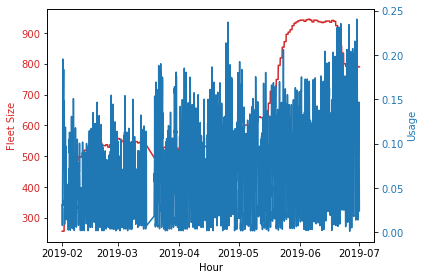

In [56]:
#Visualisation of hourly usage in Leipzig
hours = df_by_hour_merged.index
fleetsize = df_by_hour_merged["fleet_size"]
usage = df_by_hour_merged["usage"]
usedbikes = df_by_hour_merged["used_bikes"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:red'
ax_1.set_xlabel('Hour')
ax_1.set_ylabel('Fleet Size', color=color)
ax_1.plot(hours, fleetsize, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

ax_2 = ax_1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'

ax_2.set_ylabel("Usage", color=color)
ax_2.plot(hours, usage, color=color)
ax_2.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

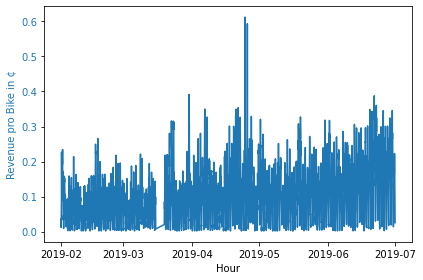

In [79]:
#Visualisation of hourly revenue pro bike in Leipzig
hours = df_by_hour_merged.index
revenueb = df_by_hour_merged["revenue_pro_bike"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Hour')
ax_1.set_ylabel('Revenue pro Bike in ¢', color=color)
ax_1.plot(hours, revenueb, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

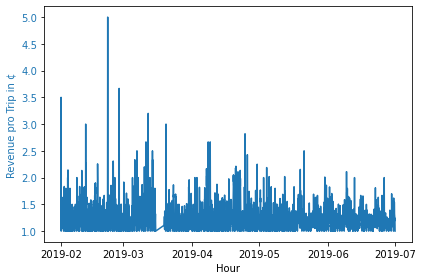

In [80]:
#Visualisation of hourly revenue pro trip in Leipzig
hours = df_by_hour_merged.index
revenuet = df_by_hour_merged["revenue_pro_trip"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Hour')
ax_1.set_ylabel('Revenue pro Trip in ¢', color=color)
ax_1.plot(hours, revenuet, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [82]:
df = Nextbike_clean_b[:]
#Fleet size for city bochum
start_date = df.date.min()
end_date = df.date.max()
delta = pd.to_timedelta("1d")

dates = []
while start_date <= end_date:
    dates.append(start_date.strftime("%Y-%m-%d"))
    start_date += delta


fleet_size = pd.DataFrame([], index = dates, columns = ["search_array","fleet_size"]) 

search_array = []
for index, row in fleet_size.iterrows():
    search_array.append(index)
    if len(search_array) > 7:
        search_array.pop(0)
    #row["date_str"] = index
    row['search_array'] = search_array[:]
    row['fleet_size'] = df[df.date.astype(str).isin(search_array[:])].b_number.nunique()
    
fleet_size.drop(columns=["search_array"], inplace = True)
fleet_size

,fleet_size
2019-02-01,29
2019-02-02,37
2019-02-03,45
2019-02-04,54
2019-02-05,79
...,...
2019-06-26,213
2019-06-27,220
2019-06-28,228
2019-06-29,223


In [83]:
#daily dateset for city bochum
df_by_date = df.groupby("date_str").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    used_bikes=('b_number', pd.Series.nunique))

df_by_date.index.astype(str, copy = False)
fleet_size.index.astype(str, copy= False)

df_by_date_merged = fleet_size.join(df_by_date)
df_by_date_merged["usage"] = df_by_date_merged["used_bikes"] / df_by_date_merged["fleet_size"]
df_by_date_merged["revenue_pro_bike"] = df_by_date_merged["revenue"] / df_by_date_merged["fleet_size"]
df_by_date_merged["revenue_pro_trip"] = df_by_date_merged["revenue"] / df_by_date_merged["trips"]

df_by_date_merged

,fleet_size,revenue,trips,used_bikes,usage,revenue_pro_bike,revenue_pro_trip
2019-02-01,29,49.0,40.0,29.0,1,1.68966,1.225000
2019-02-02,37,30.0,27.0,19.0,0.513514,0.810811,1.111111
2019-02-03,45,36.0,27.0,20.0,0.444444,0.8,1.333333
2019-02-04,54,67.0,47.0,33.0,0.611111,1.24074,1.425532
2019-02-05,79,97.0,79.0,51.0,0.64557,1.22785,1.227848
...,...,...,...,...,...,...,...
2019-06-26,213,371.0,255.0,115.0,0.539906,1.74178,1.454902
2019-06-27,220,348.0,242.0,107.0,0.486364,1.58182,1.438017
2019-06-28,228,375.0,255.0,128.0,0.561404,1.64474,1.470588
2019-06-29,223,164.0,124.0,73.0,0.327354,0.735426,1.322581


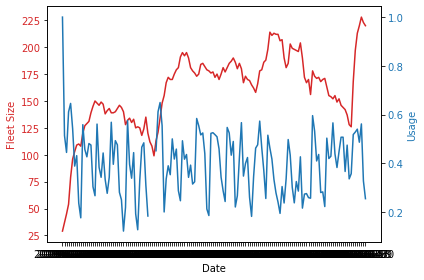

In [84]:
#Visualisation of daily usage in Bochum
dates = df_by_date_merged.index
fleetsize = df_by_date_merged["fleet_size"]
usage = df_by_date_merged["usage"]
usedbikes = df_by_date_merged["used_bikes"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:red'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Fleet Size', color=color)
ax_1.plot(dates, fleetsize, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

ax_2 = ax_1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'

ax_2.set_ylabel("Usage", color=color)
ax_2.plot(dates, usage, color=color)
ax_2.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

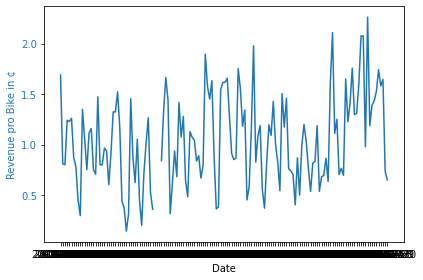

In [85]:
#Visualisation of daily revenue pro bike in Bochum
dates = df_by_date_merged.index
revenueb = df_by_date_merged["revenue_pro_bike"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Revenue pro Bike in ¢', color=color)
ax_1.plot(dates, revenueb, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

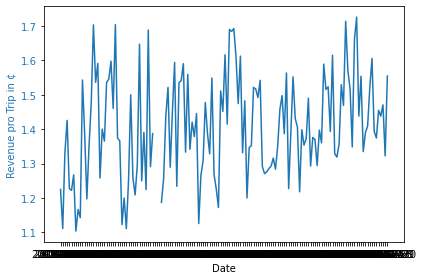

In [86]:
#Visualisation of daily revenue pro trip in Bochum
dates = df_by_date_merged.index
revenuet = df_by_date_merged["revenue_pro_trip"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Revenue pro Trip in ¢', color=color)
ax_1.plot(dates, revenuet, color=color)
ax_1.tick_params(axis='y', labelcolor=color)


Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [90]:
#hourly dateset for city bochum
df_by_hour = df.groupby("timestamp_rounded").agg(
    revenue=('revenue', "sum"),
    trips=("b_number","count"),
    date=("date","min"),
    weekday=("Weekday","min"),
    used_bikes=('b_number', pd.Series.nunique))

fleet_size.index.astype(str, copy= False)
df_by_hour["date_str"] = df_by_hour["date"].astype(str)

df_by_hour_merged = pd.merge(df_by_hour, fleet_size, right_index=True, left_on='date_str')
df_by_hour_merged["usage"] = df_by_hour_merged["used_bikes"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["revenue_pro_bike"] = df_by_hour_merged["revenue"] / df_by_hour_merged["fleet_size"]
df_by_hour_merged["revenue_pro_trip"] = df_by_hour_merged["revenue"] / df_by_hour_merged["trips"]

df_by_hour_merged

,revenue,trips,date,weekday,used_bikes,date_str,fleet_size,usage,revenue_pro_bike,revenue_pro_trip
timestamp_rounded,,,,,,,,,,
2019-02-01 00:00:00,2.0,2,2019-02-01,4,2,2019-02-01,29,0.0689655,0.0689655,1.000000
2019-02-01 02:00:00,2.0,2,2019-02-01,4,2,2019-02-01,29,0.0689655,0.0689655,1.000000
2019-02-01 07:00:00,1.0,1,2019-02-01,4,1,2019-02-01,29,0.0344828,0.0344828,1.000000
2019-02-01 08:00:00,1.0,1,2019-02-01,4,1,2019-02-01,29,0.0344828,0.0344828,1.000000
2019-02-01 09:00:00,3.0,3,2019-02-01,4,3,2019-02-01,29,0.103448,0.103448,1.000000
...,...,...,...,...,...,...,...,...,...,...
2019-06-30 19:00:00,9.0,7,2019-06-30,6,7,2019-06-30,220,0.0318182,0.0409091,1.285714
2019-06-30 20:00:00,13.0,10,2019-06-30,6,9,2019-06-30,220,0.0409091,0.0590909,1.300000
2019-06-30 21:00:00,1.0,1,2019-06-30,6,1,2019-06-30,220,0.00454545,0.00454545,1.000000


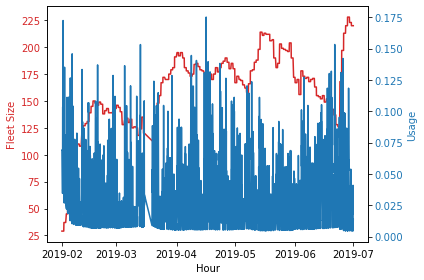

In [62]:
#Visualisation of hourly usage in bochum
hours = df_by_hour_merged.index
fleetsize = df_by_hour_merged["fleet_size"]
usage = df_by_hour_merged["usage"]
usedbikes = df_by_hour_merged["used_bikes"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:red'
ax_1.set_xlabel('Hour')
ax_1.set_ylabel('Fleet Size', color=color)
ax_1.plot(hours, fleetsize, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

ax_2 = ax_1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'

ax_2.set_ylabel("Usage", color=color)
ax_2.plot(hours, usage, color=color)
ax_2.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

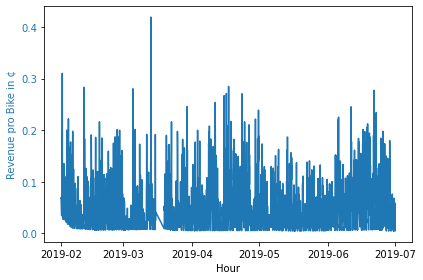

In [88]:
#Visualisation of hourly revenue pro bike in Leipzig
hours = df_by_hour_merged.index
revenueb = df_by_hour_merged["revenue_pro_bike"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Hour')
ax_1.set_ylabel('Revenue pro Bike in ¢', color=color)
ax_1.plot(hours, revenueb, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

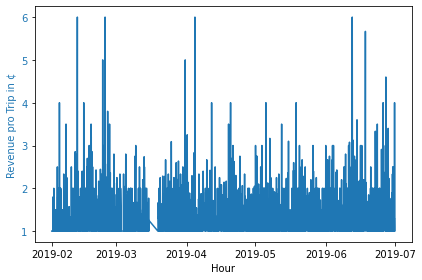

In [89]:
#Visualisation of hourly revenue pro trip in Bochum
hours = df_by_hour_merged.index
revenuet = df_by_hour_merged["revenue_pro_trip"]

Fig_1, ax_1 = plt.subplots()

color = 'tab:blue'
ax_1.set_xlabel('Hour')
ax_1.set_ylabel('Revenue pro Trip in ¢', color=color)
ax_1.plot(hours, revenuet, color=color)
ax_1.tick_params(axis='y', labelcolor=color)

Fig_1.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()